In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# out_deg = h5py.File('out_deg.h5', 'r')
# print([key for key in out_deg.keys()])
# infec_frac = h5py.File('infec_frac.h5', 'r')
# print([key for key in infec_frac.keys()])
# connec_comps = h5py.File('connec_comps.h5', 'r')
# pd.read_hdf('connec_comps.h5','sim_70_p_rew_0.01_start_10_dq_0.1')

['sim_70_p_rew_0.01_start_10_dq_0.5', 'sim_70_p_rew_0.01_start_10_dq_2', 'sim_70_p_rew_0.01_start_1_dq_0.5', 'sim_70_p_rew_0.01_start_1_dq_2', 'sim_70_p_rew_0.1_start_10_dq_0.5', 'sim_70_p_rew_0.1_start_10_dq_2', 'sim_70_p_rew_0.1_start_1_dq_0.5', 'sim_70_p_rew_0.1_start_1_dq_2', 'sim_70_p_rew_10_start_10_dq_0.5', 'sim_70_p_rew_10_start_10_dq_2', 'sim_70_p_rew_10_start_1_dq_0.5', 'sim_70_p_rew_10_start_1_dq_2', 'sim_70_p_rew_1_start_10_dq_0.5', 'sim_70_p_rew_1_start_10_dq_2', 'sim_70_p_rew_1_start_1_dq_0.5', 'sim_70_p_rew_1_start_1_dq_2', 'sim_71_p_rew_0.01_start_10_dq_0.5', 'sim_71_p_rew_0.01_start_10_dq_2', 'sim_71_p_rew_0.01_start_1_dq_0.5', 'sim_71_p_rew_0.01_start_1_dq_2', 'sim_71_p_rew_0.1_start_10_dq_0.5', 'sim_71_p_rew_0.1_start_10_dq_2', 'sim_71_p_rew_0.1_start_1_dq_0.5', 'sim_71_p_rew_0.1_start_1_dq_2', 'sim_71_p_rew_10_start_10_dq_0.5', 'sim_71_p_rew_10_start_10_dq_2', 'sim_71_p_rew_10_start_1_dq_0.5', 'sim_71_p_rew_10_start_1_dq_2', 'sim_71_p_rew_1_start_10_dq_0.5', 'sim_71

In [3]:
def obtain_deg_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,80) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        bins_number = 101
        count_deg = np.zeros((bins_number,df.shape[1]))
        for i in range(df.shape[1]) :
            count, division_deg = np.histogram(df.loc[:,i], bins = bins_number,range =(0,101))
            count_deg[:,i] = count
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average    

## Count out degree :
### Row numbers are out degree values.  Columns are time steps. Each element is the count 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


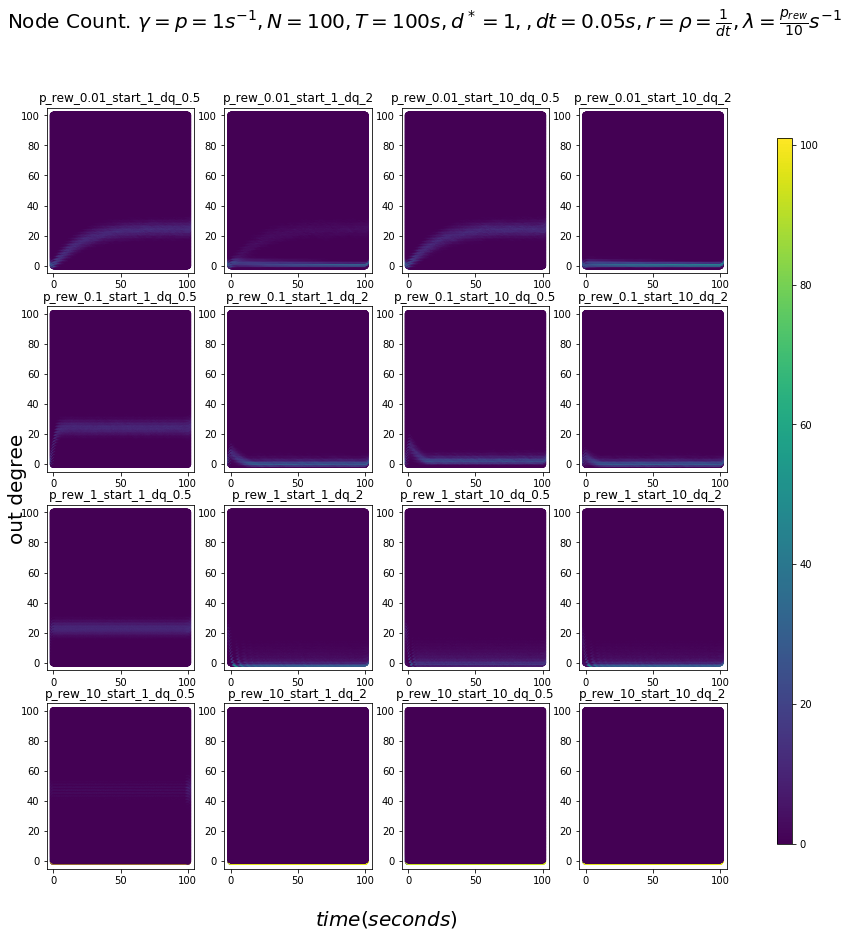

In [4]:
sampling_average_list_out = []
file = 'adjmat_outdegree.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0.01,0.1,1,10]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
#         if a == 0 :
#             key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        sampling_average = obtain_deg_sampling_average(key_half,file)
        sampling_average_list_out.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Node Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'out degree', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("out_deg.png", format="png")

## Count in degree :
### Row numbers are in degree values.  Columns are time steps. Each element is the count 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


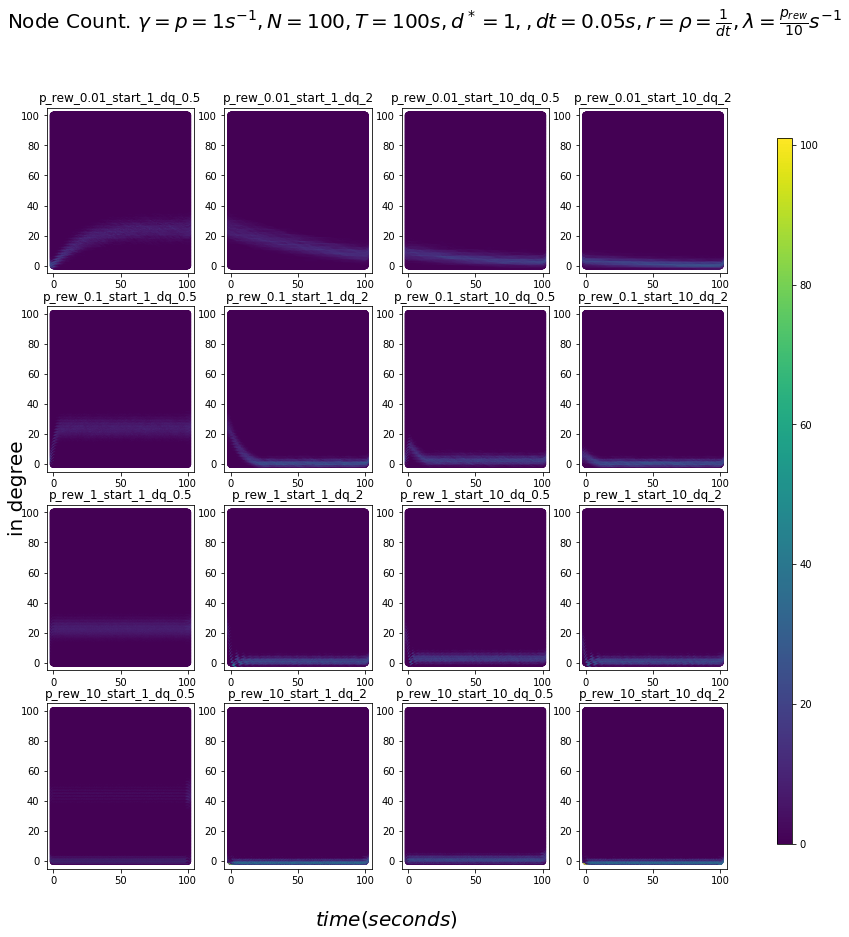

In [9]:
sampling_average_list_in = []
file = 'in_deg.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0.01,0.1,1,10]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
#         if a == 0 :
#             key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        sampling_average = obtain_deg_sampling_average(key_half,file)
        sampling_average_list_in.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=101)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Node Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'in degree', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("in_deg.png", format="png")

## Infected Fraction

In [3]:
def obtain_infec_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,120) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

In [4]:
def obtain_infec_sampling_colourmap(key_half,file) :
    frames = []
    sampling = []
    for j in range(70,120) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        result = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        frames.append(result)
    df = pd.concat(frames)

    bins_number = 11
    count_deg = np.zeros((bins_number,df.shape[1]))
    for i in range(df.shape[1]) :
        count, division_deg = np.histogram(df.loc[:,i], bins = bins_number,range =(0,1.01))
#         count, division_deg = np.histogram(df.loc[:,i], bins = bins_number)
        count_deg[:,i] = count
    sampling.append(count_deg)

    sampling_average = 999*np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average,df

#### Infected Fraction Colour map

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


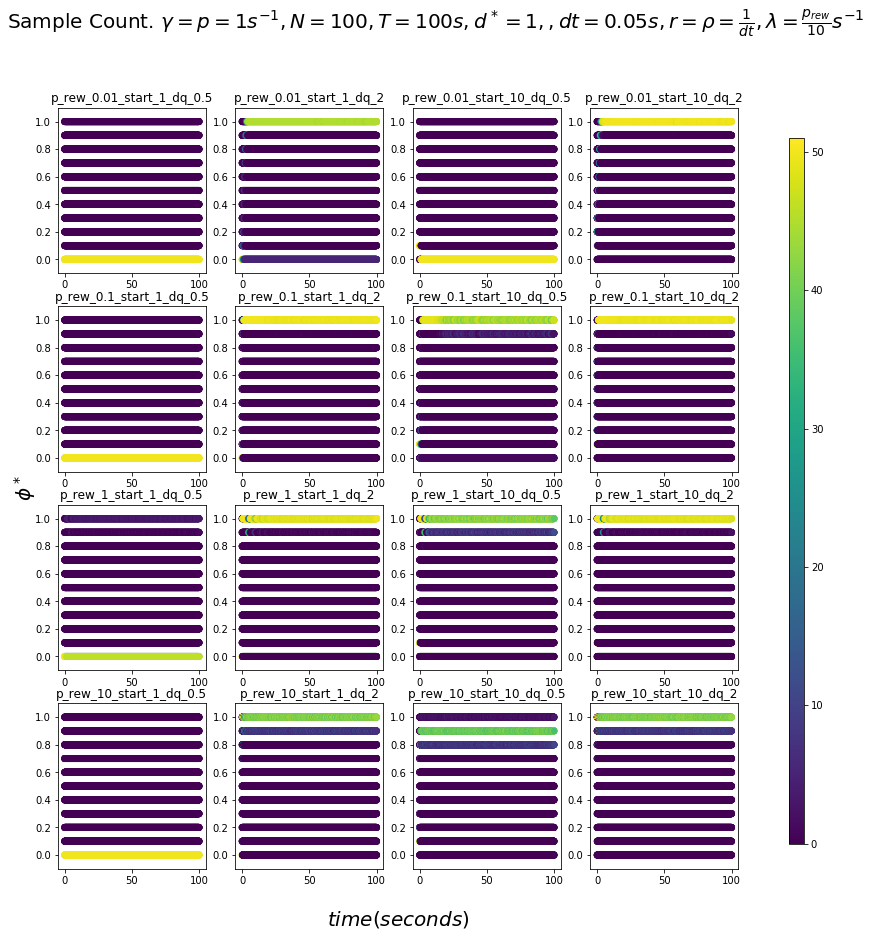

In [5]:
sampling_average_list_infected_cmap = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,1.01,0.1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0.01,0.1,1,10]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
#         if a == 0 :
#             key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average,df = obtain_infec_sampling_colourmap(key_half,file)
        sampling_average_list_infected_cmap.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
#         im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        im = col.scatter(X,Y,c= sampling_average,vmin=0, vmax=51)
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Sample Count. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac_cmap.png", format="png")

#### Infected Fraction Sampling Average

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


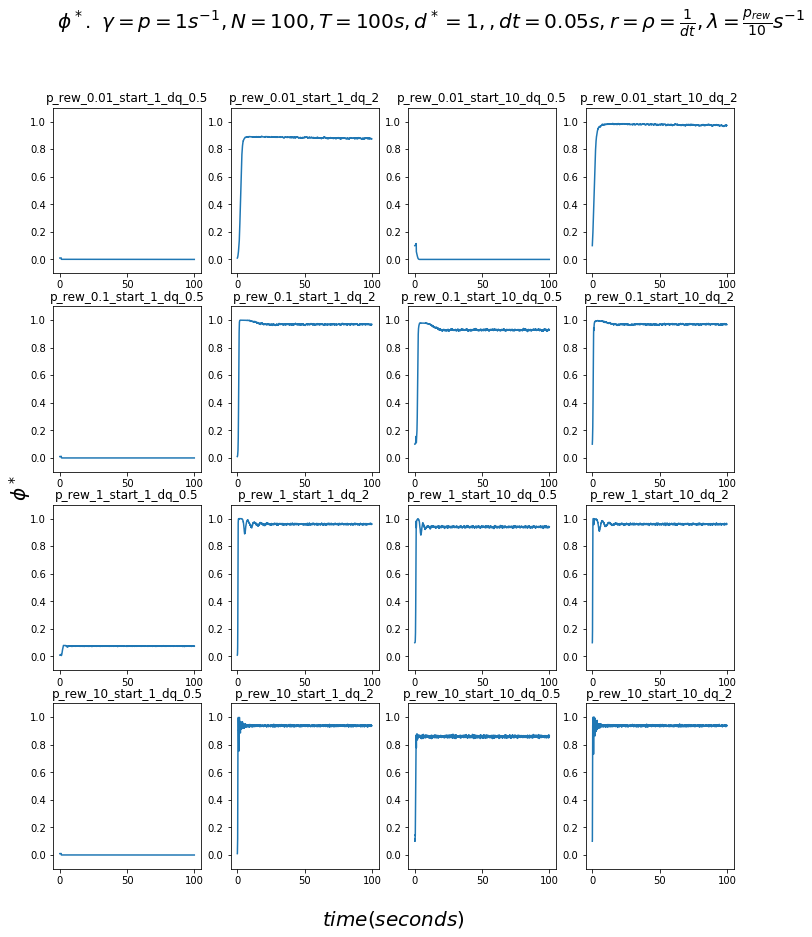

In [10]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0.01,0.1,1,10]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
#         if a == 0 :
#             key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        sampling_average_list_infected.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac.svg", format="svg")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


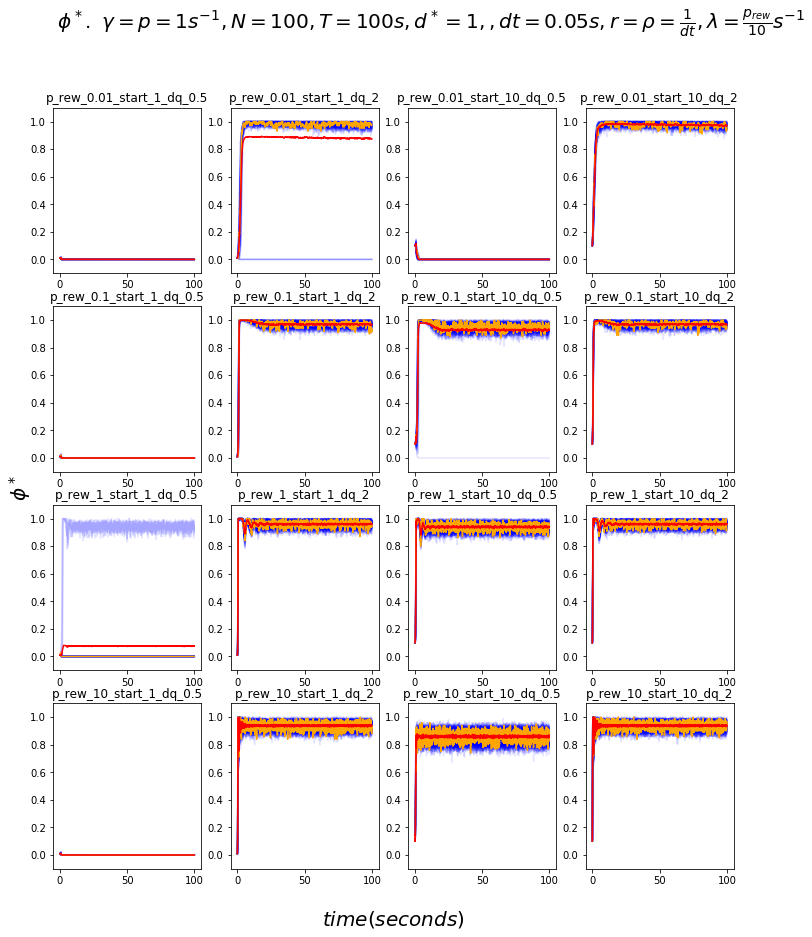

In [9]:
sampling_average_list_infected = []
file = 'infec_frac.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0.01,0.1,1,10]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
#         if a == 0 :
#             key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_infec_sampling_average(key_half,file)
        sampling_average_list_infected.append(sampling_average)
        for i in range(70,120) :
            key = 'sim_'+str(i)+key_half
            df = pd.read_hdf(file,key)
            count_deg = df.values
            im = col.plot(x.flatten(),count_deg.flatten(),linestyle = '-',color='blue',alpha=0.1)
        i = np.random.randint(70,120)
        key = 'sim_'+str(i)+key_half
        df = pd.read_hdf(file,key)
        count_deg = df.values
        im = col.plot(x.flatten(),count_deg.flatten(),linestyle = '-',color='orange')
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-',color='red')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'$\phi^*.$ $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'$\phi^*$', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("infec_frac.png", format="png")

## Connected Components

In [14]:
def obtain_connected_comps_sampling_average(key_half,file) :
    sampling = []
    for j in range(70,75) :
#         key = 'sim_'+str(j)+'_p_rew_0_start_1_dq_1'
        key = 'sim_'+str(j)+key_half
#         print(key)
        df = pd.read_hdf(file,key)
        # df.shape[0] #this is the number of rows
        count_deg = df.values
        sampling.append(count_deg)

    sampling_average = np.ones(shape=np.shape(count_deg))
    for i in range(df.shape[1]) :
        sampling_average[:,i] = np.mean([item[:,i] for item in sampling],axis=0)
        
    return sampling_average

### Connected Components average

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


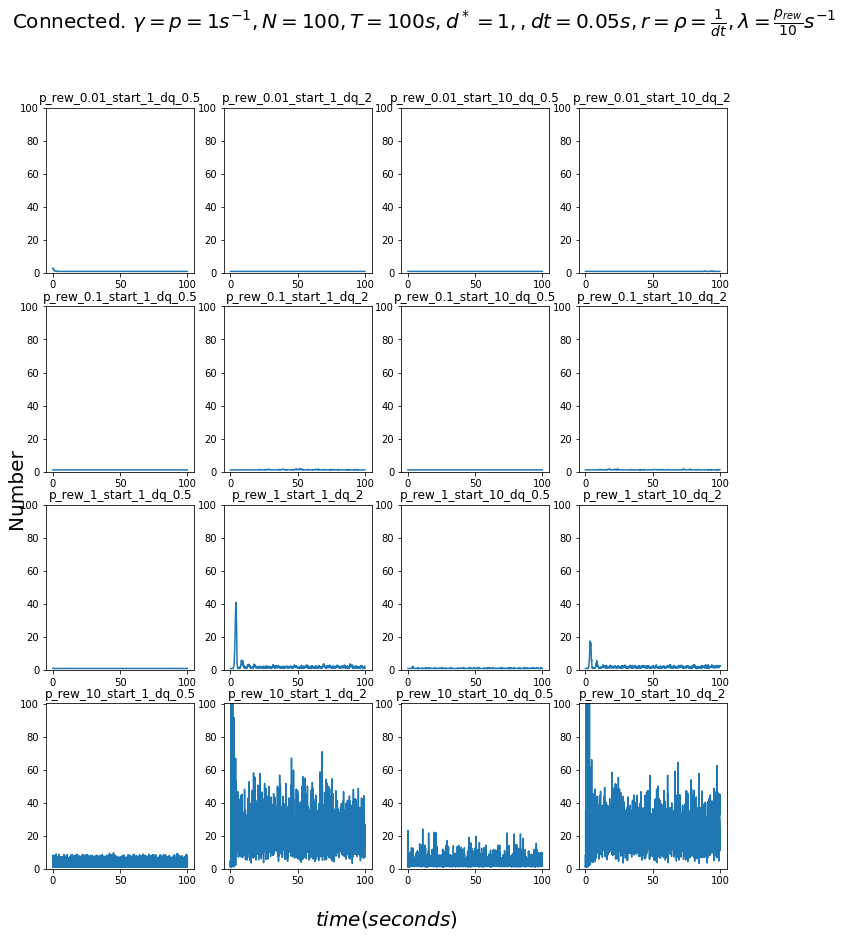

In [16]:
sampling_average_list_cc_av = []
file = 'connec_comps.h5'

x = np.arange(0,100,0.05)
y = np.arange(0,101,1)
X,Y = np.meshgrid(x,y)

p_rew_vals = [0.01,0.1,1,10]
start_vals = [1,10]
dose_quantity_vals = [0.5,2]

counter = 0
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(14,14))
a = 0
m = 0 #for the title
for row in ax:
    b = 0
    d = 0
    n = 0 #for the title
    for col in row:
        print(counter)
        if d == 2 :
            b = b + 1
            d = 0
        key_half = '_p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        key_half_title = 'p_rew_'+str(p_rew_vals[a])+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
#         if a == 0 :
#             key_half_title = '_p_rew_0.1'+'_start_'+str(start_vals[b])+'_dq_'+str(dose_quantity_vals[d])
        d = d + 1
        ax[m, n].set_title(key_half_title)
        ax[m, n].set_ylim([-0.1,100.1])
#         ax[m, n].set_ylim([-0.1,1.1])
        sampling_average = obtain_connected_comps_sampling_average(key_half,file)
        sampling_average_list_cc_av.append(sampling_average)
#         im = col.scatter(X,Y,c= sampling_average_list[counter],vmin=0, vmax=101)
        im = col.plot(x.flatten(),sampling_average.flatten(),linestyle = '-')
        counter = counter + 1
        n = n + 1
    a = a + 1
    m = m + 1

nax = fig.add_subplot(111, frame_on = False)
nax.set_xticks([])
nax.set_yticks([])
fig.suptitle(r'Connected. $\gamma=p=1s^{-1},N=100,T=100s,d^*=1,,dt=0.05s,r=\rho=\frac{1}{dt},\lambda=\frac{p_{rew}}{10}s^{-1}$',fontsize = 20)
nax.set_xlabel(r'$time(seconds)$', fontsize = 20, labelpad=40)
nax.set_ylabel(r'Number', fontsize = 20, labelpad=20)
fig.subplots_adjust(right=0.8)

# cbar_ax = fig.add_axes([0.85, 0.15, 0.015, 0.7])
# fig.colorbar(im, cax=cbar_ax)

plt.savefig("connec_comps_av.svg", format="svg")